In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

In [2]:
df = pd.read_csv('co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,NaN,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      6646 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  6646 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### Initial analysis
- fill the null values in ('Fuel type', 'Fuel Consumption')
- Encode all the non numeric values

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6646.0,12.532531,3.490461,4.2,10.0,12.0,14.5,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


The numeric data appears to be normally distributed as the mean and the median are close so it's less likely there will be outliers

In [5]:
imputer_mode = SimpleImputer(strategy="most_frequent")
df['Transmission'] = imputer_mode.fit_transform(df[['Transmission']])[:,0]

In [6]:
imputer_median = SimpleImputer(strategy="median")
df['Fuel Consumption City (L/100 km)'] = imputer_median.fit_transform(df[['Fuel Consumption City (L/100 km)']])[:,0]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
df = df.apply(LabelEncoder().fit_transform)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Make                              7385 non-null   int32
 1   Model                             7385 non-null   int32
 2   Vehicle Class                     7385 non-null   int32
 3   Engine Size(L)                    7385 non-null   int64
 4   Cylinders                         7385 non-null   int64
 5   Transmission                      7385 non-null   int32
 6   Fuel Type                         7385 non-null   int32
 7   Fuel Consumption City (L/100 km)  7385 non-null   int64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   int64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   int64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64
 11  CO2 Emissions(g/km)               7385 non-null   int64
dtypes: int32(5), int64(7)
memory usage

In [10]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,8,1,14,4,56,25,43,22,86
1,0,1057,0,12,1,25,4,69,35,54,18,111
2,0,1058,0,5,1,15,4,17,16,17,37,29
3,0,1233,11,21,3,15,4,84,49,69,14,145
4,0,1499,11,21,3,15,4,78,45,64,16,134


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train, y_train)

0.9173767235662438

In [16]:
y_pred = lr.predict(X_test)

In [17]:
lr.score(X_test, y_test)

0.9143523881388135

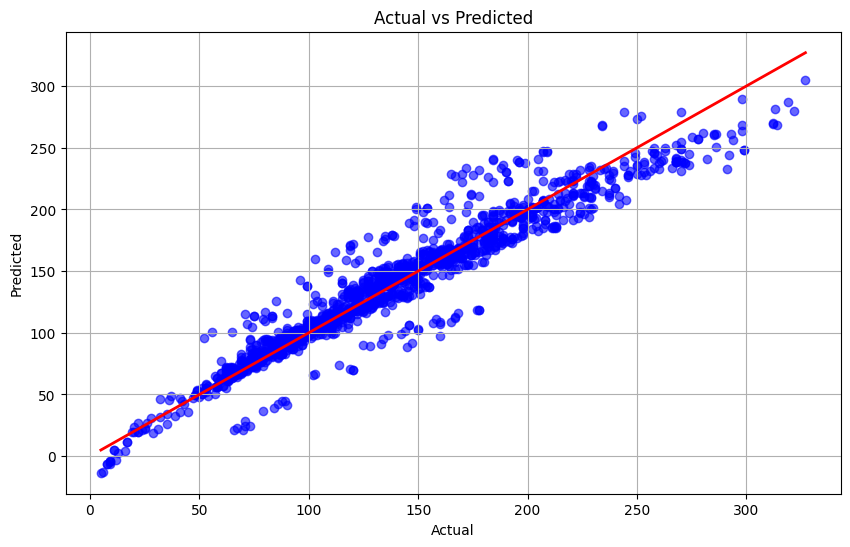

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 286.06906609970673
R² Score: 0.9143523881388135


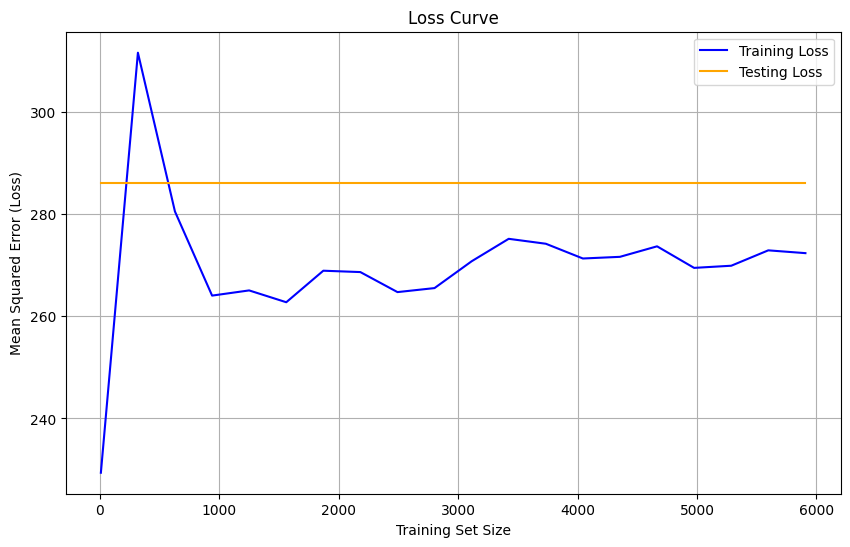

In [20]:
train_losses = []
test_losses = []
steps = np.linspace(10, len(X_train), 20, dtype=int)
for step in steps:
    train_pred = lr.predict(X_train[:step])
    test_pred = lr.predict(X_test)
    train_loss = mean_squared_error(y_train[:step], train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss', color='blue')
plt.plot(steps, test_losses, label='Testing Loss', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [21]:
knn = KNeighborsRegressor(n_neighbors=5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [23]:
y_pred = knn.predict(X_test)

In [24]:
knn.score(X_test,y_test)

0.9615262303598531

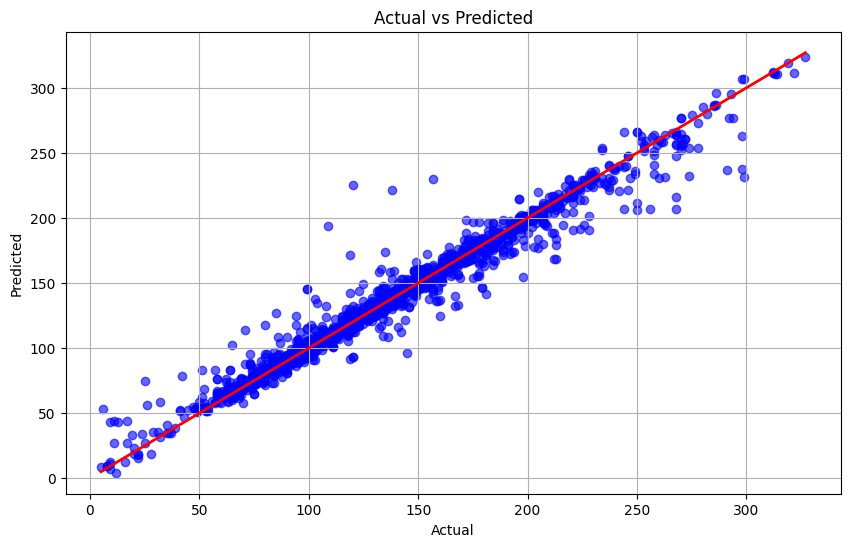

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 128.5051049424509
R² Score: 0.9615262303598531


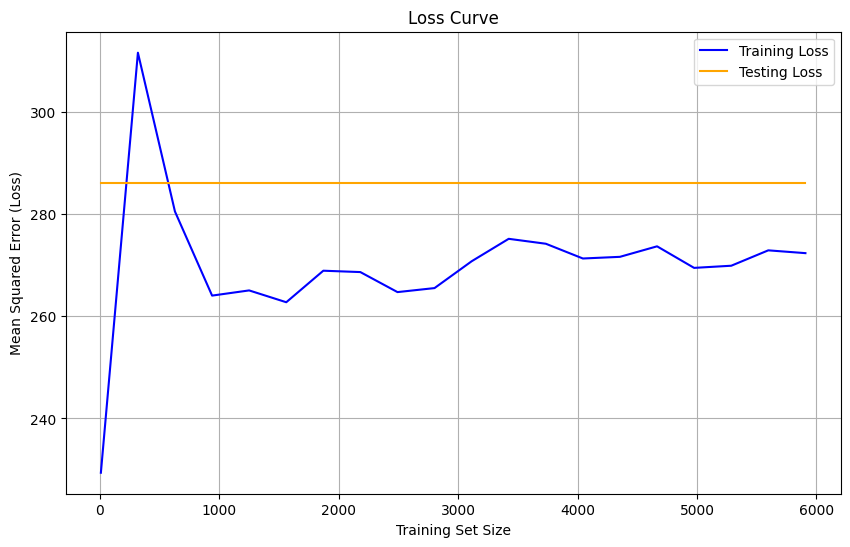

In [27]:
train_losses = []
test_losses = []
steps = np.linspace(10, len(X_train), 20, dtype=int)
for step in steps:
    train_pred = lr.predict(X_train[:step])
    test_pred = lr.predict(X_test)
    train_loss = mean_squared_error(y_train[:step], train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss', color='blue')
plt.plot(steps, test_losses, label='Testing Loss', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

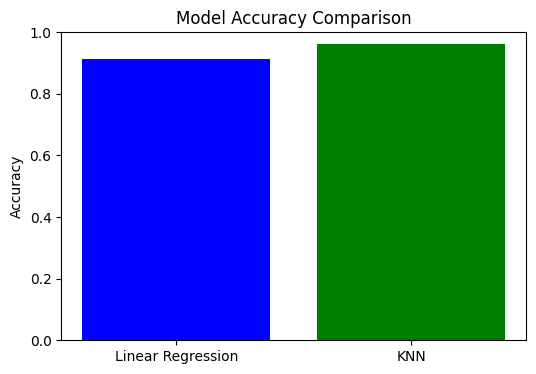

In [28]:
lr_accuracy = lr.score(X_test, y_test)
knn_accuracy = knn.score(X_test, y_test)
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Linear Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()